# Customer Churn Analysis Report
 
## Introduction

# Objective:

## The primary goal of this analysis is to build a predictive model to identify customers likely to churn and to provide actionable recommendations to reduce churn rates.

# Business Problem Statement:


## Customer churn is a major challenge for SyriaTel, a telecommunications company. Losing customers means lost revenue and increased customer acquisition costs. The company needs to identify patterns in customer behavior to predict which customers are likely to leave, allowing them to take proactive measures to retain them.


# Project Objectives:


## 1️ Build a Classification Model
### Develop a machine learning model to predict whether a customer will churn based on their usage patterns and account details.
## 2️ Identify Key Factors Driving Churn
### Analyze which features (e.g., call duration, data usage, contract type) impact customer retention the most.
## 3️ Improve Business Decision-Making
### Provide actionable recommendations for reducing churn (e.g., targeted offers, customer engagement strategies).
## 4️ Evaluate Model Performance
### Compare multiple classification models (Logistic Regression, Decision Trees, Random Forest) using metrics like Accuracy, Precision, Recall, and ROC-AUC.
## 5️ Communicate Findings
### Present insights in a Jupyter Notebook, GitHub Repository, and a non-technical presentation for SyriaTel’s business team.



# Data Overview





## The dataset consists of customer usage and service-related attributes.

## The target variable is churn, which indicates whether a customer has left the service.

## Key features analyzed include:

## Total Day Minutes, Total Day Charge, Customer Service Calls, International Plan

## Various other usage and billing-related features

# Data Understanding

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [199]:
df= pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [201]:
print(df.head())  # Check if 'churn' exists


  state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...           

In [203]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [207]:
# Count missing values per column
df.isnull().sum()


state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

## There are no missing values from this dataset

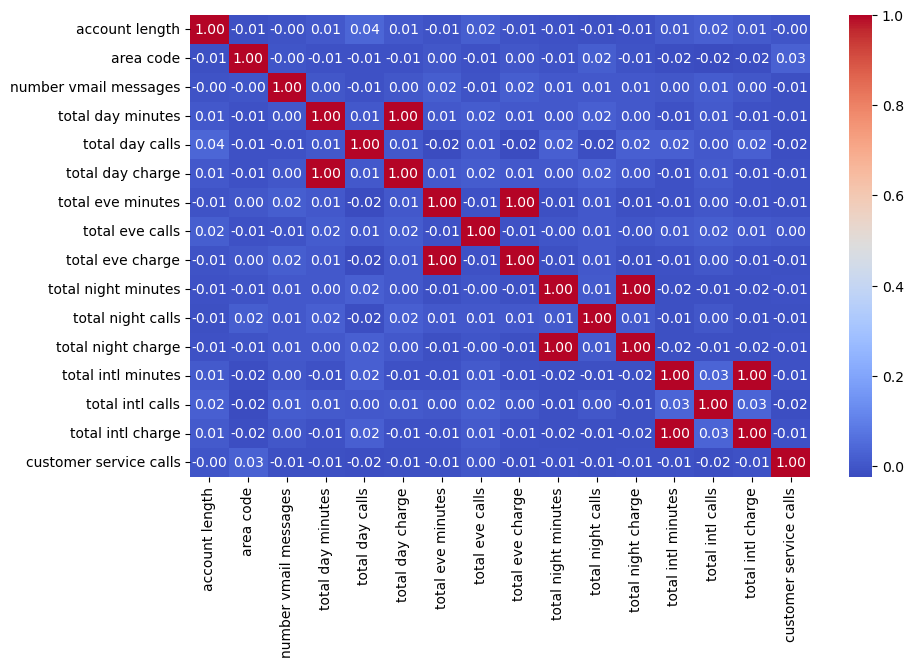

In [210]:
# Create a separate DataFrame for correlation analysis (DO NOT overwrite df)
numeric_df = df.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

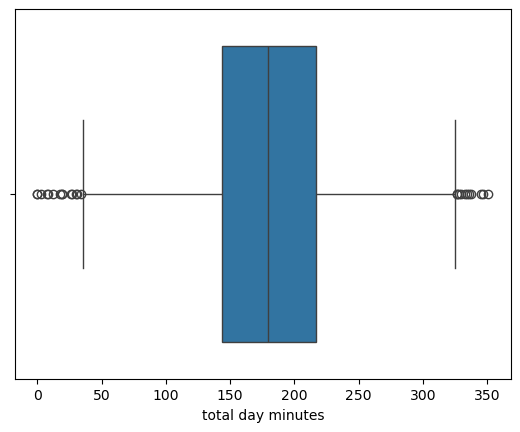

In [211]:
#Boxplot for potential outliers
sns.boxplot(x=df["total day minutes"])
plt.show()

In [213]:
print(df.head())  # Check if 'churn' exists


  state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...           

# Feature Selection and preprocessing

In [217]:
# Drop non-informative columns
df.drop(columns=['area code'], inplace=True)


In [219]:
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})


In [221]:
print(df['churn'].value_counts(normalize=True))


churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64


# Scaling

In [224]:
from sklearn.preprocessing import StandardScaler

# Store 'churn' separately
target = df['churn']  # Keep churn safe

# Select numerical columns (excluding target)
num_cols = df.drop(columns=['churn']).select_dtypes(include=['number']).columns  

# Apply StandardScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Re-add 'churn' to the DataFrame
df['churn'] = target


# Spliting Data Into Training & Testing Sets

In [227]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['churn'])  # Features (excluding target)
y = df['churn']  # Target variable

# Split dataset into 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Confirm dataset sizes
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")


Training set: (2666, 19), Test set: (667, 19)


# Train a Baseline Model (Logistic Regression)

In [230]:
print(X_train.dtypes)  # Check data types of all columns


state                      object
account length            float64
phone number               object
international plan        float64
voice mail plan           float64
number vmail messages     float64
total day minutes         float64
total day calls           float64
total day charge          float64
total eve minutes         float64
total eve calls           float64
total eve charge          float64
total night minutes       float64
total night calls         float64
total night charge        float64
total intl minutes        float64
total intl calls          float64
total intl charge         float64
customer service calls    float64
dtype: object


In [232]:
# Convert categorical columns to numeric
for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col] = X_train[col].astype('category').cat.codes
    X_test[col] = X_test[col].astype('category').cat.codes  # Apply to test set too

# Verify that all columns are now numeric
print(X_train.dtypes)


state                        int8
account length            float64
phone number                int16
international plan        float64
voice mail plan           float64
number vmail messages     float64
total day minutes         float64
total day calls           float64
total day charge          float64
total eve minutes         float64
total eve calls           float64
total eve charge          float64
total night minutes       float64
total night calls         float64
total night charge        float64
total intl minutes        float64
total intl calls          float64
total intl charge         float64
customer service calls    float64
dtype: object


In [234]:
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [236]:
from sklearn.preprocessing import StandardScaler

# Apply StandardScaler to numerical columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [238]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train Logistic Regression Model
log_model = LogisticRegression(max_iter=500, random_state=42)
log_model.fit(X_train, y_train)

# Make predictions
y_pred = log_model.predict(X_test)

# Evaluate Model Performance
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))


Accuracy: 0.8576
              precision    recall  f1-score   support

       False       0.88      0.96      0.92       570
        True       0.52      0.25      0.34        97

    accuracy                           0.86       667
   macro avg       0.70      0.60      0.63       667
weighted avg       0.83      0.86      0.84       667



# Train a decicion tree model

In [241]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate Decision Tree
print("Decision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(classification_report(y_test, y_pred_dt))


Decision Tree Performance:
Accuracy: 0.9025
              precision    recall  f1-score   support

       False       0.94      0.94      0.94       570
        True       0.67      0.66      0.66        97

    accuracy                           0.90       667
   macro avg       0.80      0.80      0.80       667
weighted avg       0.90      0.90      0.90       667



# Train a Random Forest Model (Ensemble)



In [244]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
print("Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf))


Random Forest Performance:
Accuracy: 0.9400
              precision    recall  f1-score   support

       False       0.95      0.98      0.97       570
        True       0.88      0.68      0.77        97

    accuracy                           0.94       667
   macro avg       0.91      0.83      0.87       667
weighted avg       0.94      0.94      0.94       667



# Training K-Nearest Neighbors (KNN) and Naive Bayes Classifiers

In [252]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # k=5 as a default
knn_model.fit(X_train, y_train)

# Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)


GaussianNB()

# Predictions for all models

In [255]:
# Predictions for all models
y_pred_lr = log_model.predict(X_test)  # Logistic Regression
y_pred_dt = dt_model.predict(X_test)   # Decision Tree
y_pred_rf = rf_model.predict(X_test)   # Random Forest
y_pred_knn = knn_model.predict(X_test) # KNN
y_pred_nb = nb_model.predict(X_test)   # Naive Bayes


# Evaluating model performance

In [258]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Store predictions in a dictionary
model_predictions = {
    "Logistic Regression": y_pred_lr,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "KNN": y_pred_knn,
    "Naive Bayes": y_pred_nb
}

# Store results
model_results = {}

# Evaluate each model
for model_name, y_pred in model_predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store in dictionary
    model_results[model_name] = {
        "Accuracy": accuracy,
        "Classification Report": report,
        "Confusion Matrix": conf_matrix
    }

    # Print evaluation metrics
    print(f"\n{'='*40}")
    print(f"🔹 Model: {model_name}")
    print(f"🔹 Accuracy: {accuracy:.4f}")
    print(f"🔹 Classification Report:\n{report}")
    print(f"🔹 Confusion Matrix:\n{conf_matrix}")

# Compare models in a table format
model_comparison = pd.DataFrame({
    "Model": model_results.keys(),
    "Accuracy": [model_results[model]["Accuracy"] for model in model_results]
}).sort_values(by="Accuracy", ascending=False)

print("\n🔹 Model Performance Comparison")
print(model_comparison)



🔹 Model: Logistic Regression
🔹 Accuracy: 0.8576
🔹 Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.96      0.92       570
        True       0.52      0.25      0.34        97

    accuracy                           0.86       667
   macro avg       0.70      0.60      0.63       667
weighted avg       0.83      0.86      0.84       667

🔹 Confusion Matrix:
[[548  22]
 [ 73  24]]

🔹 Model: Decision Tree
🔹 Accuracy: 0.9025
🔹 Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.94      0.94       570
        True       0.67      0.66      0.66        97

    accuracy                           0.90       667
   macro avg       0.80      0.80      0.80       667
weighted avg       0.90      0.90      0.90       667

🔹 Confusion Matrix:
[[538  32]
 [ 33  64]]

🔹 Model: Random Forest
🔹 Accuracy: 0.9400
🔹 Classification Report:
              precision    recall  f1-score   supp

# Based on the results of the five models, random forest is the best performing.
# Random Forest model achieved the highest accuracy (94%) and the best recall & precision balance for churn prediction. Fine-tuning will make it perform better

# Hyperparameter Tuning for Random Forest
## Optimization of key parameters like:

## n_estimators → Number of trees
## max_depth → Depth of each tree
## min_samples_split → Minimum samples needed to split a node
## min_samples_leaf → Minimum samples needed per leaf

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Use all available processors
    verbose=1
)

# Fit GridSearch to training data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Random Forest Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


# Training Final Random Forest Model with Best Hyperparameters

In [ ]:
best_rf = RandomForestClassifier(
    n_estimators=grid_search.best_params_['n_estimators'],
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    random_state=42
)

best_rf.fit(X_train, y_train)

# Make predictions
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate model
print(f"Final Random Forest Accuracy: {accuracy_score(y_test, y_pred_best_rf):.4f}")
print(classification_report(y_test, y_pred_best_rf))


# Feature importance analysis

In [ ]:
# Ensure we use the correct feature names
feature_names = df.drop(columns=['churn']).columns  # Get feature names before conversion

# Extract feature importances
feature_importances = pd.Series(best_rf.feature_importances_, index=feature_names)

# Sort & plot top features
feature_importances.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Important Features in Random Forest Model")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

# Key Findings from Feature Importance Analysis

## The top 10 most important features impacting customer churn are:

## 1. Total Day Minutes – Higher usage increases churn probability.

## 2. Customer Service Calls – More complaints correlate with higher churn.

## 3. Total Day Charge – High charges lead to churn.

## 4. International Plan – Customers with this plan are more likely to leave.

## 5. Total Eve Minutes – Evening call usage also plays a role.

## 6. Total Eve Charge – Higher charges lead to dissatisfaction.

## 7. Total Intl Calls – International callers exhibit unique churn behavior.

## 8. Total Intl Charge – High international charges affect retention.

## 9. Total Intl Minutes – International call usage influences churn.

## 10. Number of Voicemail Messages – Possibly linked to user engagement.

   # Business Recommendations
## 1. Reduce Costs for Heavy Callers:

## 2. Introduce loyalty discounts or personalized plans for high-usage customers.

## 3. Offer incentives for long-term contracts.

## 4. Enhance Customer Service Experience.

## 5. Investigate high call frequency to customer service.

## 6. Improve support quality to reduce repeated complaints.

## 7. Adjust International Plan Offerings.

## 8. Reevaluate pricing to be more competitive.

## 9. Offer additional perks for international users.

## 10. Targeted Customer Engagement.

## 11. Use predictive analytics to identify at-risk customers and reach out with personalized offers.

## 12. Implement customer satisfaction surveys to understand concerns before churn occurs.

## 13. Bundle Services for Higher Engagement.

## 14. Encourage customers to utilize more services to increase stickiness.

# Conclusion

# Random Forest was the most effective model for predicting churn.

# Customer service call frequency and high usage costs were key indicators of churn.

# A combination of targeted retention strategies, pricing optimizations, and improved service quality can significantly reduce customer churn.